In [ ]:
'''Objective: Build a model to predict the band gap of a material based on what element it is,
            its position in space, and its lattice information, using regression based machine learning'''


'''Version goal: to scale data'''


'''Future Version goal: to improve the accuracy predicted by the model'''

In [2]:
#Call data

from aflow import *

result = search(batch_size=20
        ).filter(K.Egap > 1
        ).filter(K.nspecies == 1
        ).filter(K.natoms == 3)

#part = result[0:1000]

#len(part)
#print(result[0].Egap)
for entry in result[0:5]:
    print(entry.Egap)

1.0032
1.0066
2.3992
3.3885
8.3183


In [3]:
#make data right type/shape

#make X1 from atomic name to atomic number
from mendeleev import element
import numpy as np

at_num = []

for i in result[0:6]:
    ele = (i.species[0])
    z= ele.replace('\n','')
    number= element(z).atomic_number
    #print(number)
    at_num.append(number)
    
#print(at_num)

x1= np.asarray(at_num).reshape(-1,1)
print(x1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledx1 = scaler.fit_transform(x1)
print(rescaledx1)

[[34]
 [ 9]
 [16]
 [ 8]
 [18]
 [10]]
[[1.        ]
 [0.03846154]
 [0.30769231]
 [0.        ]
 [0.38461538]
 [0.07692308]]


C:\Users\Katie\Miniconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [42]:
import numpy as np
pos=[]
for entry in result[0:6]:
    x2= entry.positions_fractional
    pos.append(x2)

#print(pos)

X2= np.asarray(pos).reshape(6,9)

print(X2)

[[ 0.21906427 -0.          0.333333   -0.          0.21906427  0.66666633
   0.78093573  0.78093573 -0.        ]
 [ 0.          0.7702899   0.33333333  0.2297101   0.2297101   0.66666667
   0.7702899   0.          0.        ]
 [ 0.          0.83014186  0.33333333  0.16985814  0.16985814  0.66666667
   0.83014186  0.          0.        ]
 [ 0.          0.84434152  0.33333333  0.15565848  0.15565848  0.66666667
   0.84434152  0.          0.        ]
 [ 0.          0.66717743  0.33333333  0.33282257  0.33282257  0.66666667
   0.66717743  0.          0.        ]
 [ 0.          0.66595466  0.33333333  0.33404534  0.33404534  0.66666667
   0.66595466  0.          0.        ]]


In [5]:

geo=[]

for entry in result[0:6]:
    #x2= entry.positions_fractional
    #X2.append(x2)
    
    x3= entry.geometry
    #print(X3)
    geo.append(x3)
    
#print(geo)


x3=np.asarray(geo).reshape(6,6)

print(x3)

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledx3 = scaler.fit_transform(x3)
print(rescaledx3)

[[  4.523779   4.523779   5.049212  90.        90.       120.      ]
 [  3.546542   3.546542   3.910963  90.        90.       120.      ]
 [  4.962433   4.962433   4.412037  90.        90.       120.      ]
 [  3.733926   3.733926   3.113593  90.        90.       120.      ]
 [  4.970289   4.970289   6.944262  90.        90.       120.      ]
 [  3.458094   3.458094   6.266973  90.        90.       120.      ]]
[[0.70472723 0.70472723 0.50529529 0.         0.         0.        ]
 [0.05848981 0.05848981 0.20815424 0.         0.         0.        ]
 [0.9948049  0.9948049  0.33896011 0.         0.         0.        ]
 [0.18240505 0.18240505 0.         0.         0.         0.        ]
 [1.         1.         1.         0.         0.         0.        ]
 [0.         0.         0.82319302 0.         0.         0.        ]]


In [44]:
X= np.hstack((rescaledx3,x1,X2))


X.shape


(6, 16)

In [70]:
#scale data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

print(rescaledX)

[[0.70472723 0.70472723 0.50529529 0.         0.         0.
  1.         1.         0.         0.         0.         0.3554398
  0.         0.6445602  1.         0.        ]
 [0.05848981 0.05848981 0.20815424 0.         0.         0.
  0.03846154 0.         0.9122966  1.         0.68766144 0.41511813
  1.         0.58488187 0.         0.        ]
 [0.9948049  0.9948049  0.33896011 0.         0.         0.
  0.30769231 0.         0.98318256 1.         0.50848828 0.07960037
  1.         0.92039963 0.         0.        ]
 [0.18240505 0.18240505 0.         0.         0.         0.
  0.         0.         1.         1.         0.4659801  0.
  1.         1.         0.         0.        ]
 [1.         1.         1.         0.         0.         0.
  0.38461538 0.         0.79017485 1.         0.99633951 0.9931454
  1.         0.0068546  0.         0.        ]
 [0.         0.         0.82319302 0.         0.         0.
  0.07692308 0.         0.78872665 1.         1.         1.
  1.         0.

In [71]:
y=[]
for entry in result[0:6]:
    BG= entry.Egap
    y.append(BG)
    
Y=np.asarray(y).reshape(-1,1)

print(Y)

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledY = scaler.fit_transform(Y)

print(rescaledY)

[[ 1.0032]
 [ 1.0066]
 [ 2.3992]
 [ 3.3885]
 [ 8.3183]
 [11.4992]]
[[0.00000000e+00]
 [3.23932927e-04]
 [1.33003049e-01]
 [2.27258003e-01]
 [6.96941692e-01]
 [1.00000000e+00]]


In [72]:
#Split the data

from sklearn.cross_validation import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(rescaledX, rescaledY, random_state=10)

In [73]:
#implement KNeighborsRegressor---choose estimator

from sklearn.neighbors import KNeighborsRegressor
estimator = KNeighborsRegressor(4, weights='distance', algorithm='kd_tree', leaf_size=3000,)

In [74]:
#train data

#X2_train, X3_train,

import numpy as np
import matplotlib.pyplot as plt

estimator.fit(X_train,  Y_train)
y_predicted = estimator.predict(X_test)

#test the accuracy
accuracy = np.mean(Y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))



The accuracy is 0.0%


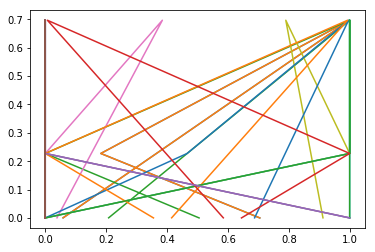

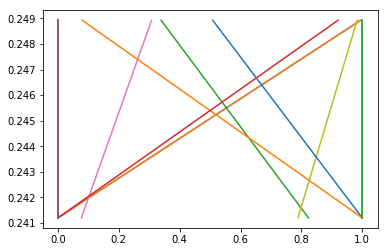

In [75]:
plt.plot(X_train, Y_train)
plt.show()
plt.plot(X_test, y_predicted)
plt.show()